# Obteniendo la información necesaria

In [2]:
import numpy as np
%matplotlib inline
import yfinance as yf
import pandas as pd
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from ObtenerInfo import descargar_info_csv_carpeta,get_df_desde_csv,get_info_accion,actualizar_csv_carpeta,actualizar_csv,set_info_df,aniadir_info_extra_stocks_carpeta,plot_ichimoku,guardar_accion_csv,correlation,plot_candlesticks

In [5]:
start_date = '2012-10-15'
end_date = '2022-10-15'

En este notebook vamos a incluir todo el código relativo a la obtención de la información que usaremos luego que provenga de fuentes externas, es decir, tenga que ser descargada o exportada. Si la información se ha obtenido calculandola a partir de información descargada aqui (transformaciones o ratios) no estara en este notebook.

Se incluye:
-Uso de pandas para leer URL
-Uso de yfinance para obtención de información de mercado historica

## PANDAS

Usamos pandas para cargar desde una URL una tabla con información sobre los constituyentes del S&P500 y otra del IBEX35, de donde obtendremos sus tickers, los cuales usaremos posteriormente para descargar su información de mercado:

### S&P500

Primero cargamos la tabla de S&P500 a un Dataframe de pandas usando la función read_html:

In [ ]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp = pd.read_html(sp_url, header=0)[0] # returns a list for each table
sp.info()

In [ ]:
sp

Tomamos la columna 'Symbol' referida al ticker de las compañias y creamos una serie de archivos .csv en donde almacenaremos la información diaria de precios de las acciones:

In [ ]:
tickers_sp500 = sp['Symbol'].tolist()
tickers_sp500

Combinamos el ticker de la compañia y el nombre para crear unos archivo de texto simple que contendran todos los constituyenes del indice.

In [ ]:
sp['Ticker,Company Name'] = sp['Symbol'] + ',' + sp['Security']

In [ ]:
sp.head()

In [ ]:
for ticker in tickers_sp500:
    open('datos/S&P500/'+ ticker + '.csv','w')

In [ ]:
df_texto = sp['Ticker,Company Name']

In [ ]:
df_texto.to_csv('s&p500.csv',index = False)

### IBEX35

In [ ]:
ibex_url = 'https://es.wikipedia.org/wiki/IBEX_35'

In [ ]:
ibex = pd.read_html(ibex_url, header=0, match='Ticker')[0]# returns a list for each table
ibex.head()

In [ ]:
ibex

In [ ]:
ibex['Ticker,Company Name'] = ibex['Ticker'] + '.MC' + ',' + ibex['Empresa']

In [ ]:
df_texto = ibex['Ticker,Company Name']

In [ ]:
tickers_ibex = ibex['Ticker'].tolist()

In [ ]:
tickers_ibex

In [ ]:
for ticker in tickers_ibex:
    open('datos/IBEX35/'+ ticker + '_MC.csv','w')

In [ ]:
df_texto.to_csv('IBEX35.csv',index = False)

# YFINANCE

### DESCARGADO INFORMACION DIARIA DE LAS ACCIONES DEL S&P500

In [ ]:
descargar_info_csv_carpeta("./datos/S&P500/","./datos/S&P500/")

In [ ]:
aniadir_info_extra_stocks_carpeta("./datos/S&P500/")

In [ ]:
actualizar_csv_carpeta("./datos/S&P500/")

### DESCARGAR DATOS SPY

In [ ]:
acciones_sin_descargar = []
path = "./datos/IBEX35/"
descargar_info_csv_carpeta(path,path)
aniadir_info_extra_stocks_carpeta(path)
df = get_df_desde_csv(path,"TEF_MC")
plot_ichimoku(df,"TEF_MC")

In [ ]:
guardar_accion_csv('SPY.csv','SPY',start_date,end_date)

### Autocorrelación parcial con retornos normales

In [ ]:
df = pd.read_csv('SPY.csv')

In [ ]:
df['retorno diario']= (df['Close']/df['Close'].shift(1)) - 1

In [ ]:
df

In [ ]:
df.set_index('Date')

In [ ]:
pd.to_datetime(df['Date'])

In [ ]:
df_retornos = df['retorno diario']*100
df_retornos

In [ ]:
df_retornos=df_retornos.to_numpy()
df_retornos=df_retornos.transpose()

In [ ]:

df_retornos=df_retornos[1:]

In [ ]:
plot_pacf(df_retornos, lags=30,title='Autocorrelación parcial')
pyplot.show()

In [ ]:
pcor = pd.DataFrame(pacf(df_retornos,nlags=40))
pcor

In [ ]:
pcor.sort_values(by=0,ascending=False,inplace=True,key=abs)
pcor

### Autocorrelación Parcial con precios

In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
df

In [ ]:
df_precio = df['Close']
df_precio.plot()

In [ ]:
df_precio = df_precio.reset_index()
df_precio = df_precio['Close']

In [ ]:
df_precio

In [ ]:
pacor = pacf(df_precio,nlags=40)
df_precio = pd.DataFrame(pacor)
df_precio

In [ ]:
df_precio.sort_values(by=0,ascending=False,inplace=True,key=abs)
df_precio

In [ ]:
df = get_df_desde_csv('datos/S&P500/','AAPL')
df

In [ ]:
df['retorno diario']= (df['Close']/df['Close'].shift(1)) - 1

In [ ]:
df

In [ ]:
df.set_index('Date')

In [ ]:
pd.to_datetime(df['Date'])

In [ ]:
df_retornos = df['retorno diario']*100
df_retornos

In [ ]:
df_retornos=df_retornos.to_numpy()
df_retornos=df_retornos.transpose()

In [ ]:
df_retornos=df_retornos[1:]

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
plot_pacf(df_retornos, lags=30,title='Autocorrelación parcial')
pyplot.show()

In [ ]:
pcor = pd.DataFrame(pacf(df_retornos,nlags=40))
pcor

In [ ]:
pcor.sort_values(by=0,ascending=False,inplace=True,key=abs)
pcor

### Añadiendo las 101 alfas

In [6]:
SPY = yf.Ticker('SPY')
data = SPY.history(start=start_date,end=end_date)

In [7]:
data

Open        High         Low       Close     Volume  \
Date                                                                    
2012-10-15  118.662377  119.490851  118.281285  119.366585  107689100   
2012-10-16  119.929940  120.659001  119.847100  120.576149  108815500   
2012-10-17  120.659012  121.222381  120.476746  121.122955  128834100   
2012-10-18  120.808121  121.388050  120.402164  120.808121  148108500   
2012-10-19  120.584391  120.592671  118.513206  118.794884  185645200   
...                ...         ...         ...         ...        ...   
2022-10-10  363.959991  364.209991  357.670013  360.019989   76042800   
2022-10-11  358.239990  363.029999  355.709991  357.739990   92482800   
2022-10-12  358.170013  359.820007  356.299988  356.559998   76991800   
2022-10-13  349.209991  367.510010  348.109985  365.970001  147254500   
2022-10-14  368.549988  370.260010  356.959991  357.630005  123625000   

            Dividends  Stock Splits  
Date                                 
2012-10-15        0.0             0  
2012-10-16        0.0             0  
2012-10-17        0.0             0  
2012-10-18        0.0             0  
2012-10-19        0.0             0  
...               ...           ...  
2022-10-10        0.0             0  
2022-10-11        0.0             0  
2022-10-12        0.0             0  
2022-10-13        0.0             0  
2022-10-14        0.0             0  

[2517 rows x 7 columns]

In [8]:
data = data.drop(['Dividends','Stock Splits'],axis=1)

In [9]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [10]:
import utils as u
data['vwap'] = u.vwap(data)
data['returns'] = u.returns(data)

In [11]:
data

Open        High         Low       Close     Volume  \
Date                                                                    
2012-10-15  118.662377  119.490851  118.281285  119.366585  107689100   
2012-10-16  119.929940  120.659001  119.847100  120.576149  108815500   
2012-10-17  120.659012  121.222381  120.476746  121.122955  128834100   
2012-10-18  120.808121  121.388050  120.402164  120.808121  148108500   
2012-10-19  120.584391  120.592671  118.513206  118.794884  185645200   
...                ...         ...         ...         ...        ...   
2022-10-10  363.959991  364.209991  357.670013  360.019989   76042800   
2022-10-11  358.239990  363.029999  355.709991  357.739990   92482800   
2022-10-12  358.170013  359.820007  356.299988  356.559998   76991800   
2022-10-13  349.209991  367.510010  348.109985  365.970001  147254500   
2022-10-14  368.549988  370.260010  356.959991  357.630005  123625000   

                  vwap   returns  
Date                              
2012-10-15  119.366585       NaN  
2012-10-16  120.576149  0.010133  
2012-10-17  121.122955  0.004535  
2012-10-18  120.808121 -0.002599  
2012-10-19  118.794884 -0.016665  
...                ...       ...  
2022-10-10  360.019989 -0.007635  
2022-10-11  357.739990 -0.006333  
2022-10-12  356.559998 -0.003298  
2022-10-13  365.970001  0.026391  
2022-10-14  357.630005 -0.022789  

[2517 rows x 7 columns]

In [12]:
import feature_generation as fg

unavailable = [100,97,93,90,89,87,83,82,80,79,76,70,69,67,63,59,58,57,56,48]


alphas = []

for n in range(101):
    if (n+1) not in unavailable:
        name = 'alpha{}'.format(n+1)
        func = 'fg.{}'.format(name)
        temp_func = eval(func)
        data[name] = temp_func(data)

In [13]:
data

Open        High         Low       Close     Volume  \
Date                                                                    
2012-10-15  118.662377  119.490851  118.281285  119.366585  107689100   
2012-10-16  119.929940  120.659001  119.847100  120.576149  108815500   
2012-10-17  120.659012  121.222381  120.476746  121.122955  128834100   
2012-10-18  120.808121  121.388050  120.402164  120.808121  148108500   
2012-10-19  120.584391  120.592671  118.513206  118.794884  185645200   
...                ...         ...         ...         ...        ...   
2022-10-10  363.959991  364.209991  357.670013  360.019989   76042800   
2022-10-11  358.239990  363.029999  355.709991  357.739990   92482800   
2022-10-12  358.170013  359.820007  356.299988  356.559998   76991800   
2022-10-13  349.209991  367.510010  348.109985  365.970001  147254500   
2022-10-14  368.549988  370.260010  356.959991  357.630005  123625000   

                  vwap   returns    alpha1    alpha2    alpha3  ...  alpha86  \
Date                                                            ...            
2012-10-15  119.366585       NaN       NaN       NaN       NaN  ...        0   
2012-10-16  120.576149  0.010133       NaN       NaN       NaN  ...        0   
2012-10-17  121.122955  0.004535       NaN       NaN       NaN  ...        0   
2012-10-18  120.808121 -0.002599       NaN       NaN       NaN  ...        0   
2012-10-19  118.794884 -0.016665       NaN       NaN       NaN  ...        0   
...                ...       ...       ...       ...       ...  ...      ...   
2022-10-10  360.019989 -0.007635 -0.443642  0.522104  0.347362  ...        0   
2022-10-11  357.739990 -0.006333 -0.177497  0.448061  0.252213  ...       -1   
2022-10-12  356.559998 -0.003298 -0.320899  0.091750  0.020725  ...       -1   
2022-10-13  365.970001  0.026391  0.302447 -0.608834  0.301627  ...        0   
2022-10-14  357.630005 -0.022789  0.002006 -0.284940  0.211087  ...        0   

             alpha88  alpha91   alpha92   alpha94  alpha95  alpha96   alpha98  \
Date                                                                            
2012-10-15       NaN     None       NaN       NaN    False      NaN       NaN   
2012-10-16       NaN     None       NaN       NaN    False      NaN       NaN   
2012-10-17       NaN     None       NaN       NaN    False      NaN       NaN   
2012-10-18       NaN     None       NaN       NaN    False      NaN       NaN   
2012-10-19       NaN     None       NaN       NaN    False      NaN       NaN   
...              ...      ...       ...       ...      ...      ...       ...   
2022-10-10  0.228049     None  1.000000 -0.382682    False    0.875 -0.095136   
2022-10-11  0.223282     None  0.947368 -0.273785     True    1.000 -0.082867   
2022-10-12  0.257449     None  0.842105 -0.142990     True    1.000 -0.057757   
2022-10-13  0.106476     None  0.571429 -0.816840     True    1.000  0.083978   
2022-10-14  0.136671     None  0.428571 -0.576839    False    1.000  0.040364   

             alpha99  alpha101  
Date                            
2012-10-15       NaN  0.581718  
2012-10-16       NaN  0.794941  
2012-10-17       NaN  0.621380  
2012-10-18       NaN  0.000000  
2012-10-19       NaN -0.860147  
...              ...       ...  
2022-10-10 -0.491979 -0.602357  
2022-10-11 -0.391608 -0.068297  
2022-10-12 -0.247223 -0.457258  
2022-10-13 -0.134513  0.863872  
2022-10-14 -0.245167 -0.820988  

[2517 rows x 88 columns]

In [14]:
data['-2 day'] = data['returns'].shift(1)
data['-4 day'] = data['returns'].shift(3)
data['-6 day'] = data['returns'].shift(5)
data['-7 day'] = data['returns'].shift(6)
data['-8 day'] = data['returns'].shift(7)
data['-9 day'] = data['returns'].shift(8)
data['-13 day'] = data['returns'].shift(12)
data['-23 day'] = data['returns'].shift(22)
data['-27 day'] = data['returns'].shift(26)

In [15]:
data['next returns'] = data['returns'].shift(-1)

In [16]:
data

Open        High         Low       Close     Volume  \
Date                                                                    
2012-10-15  118.662377  119.490851  118.281285  119.366585  107689100   
2012-10-16  119.929940  120.659001  119.847100  120.576149  108815500   
2012-10-17  120.659012  121.222381  120.476746  121.122955  128834100   
2012-10-18  120.808121  121.388050  120.402164  120.808121  148108500   
2012-10-19  120.584391  120.592671  118.513206  118.794884  185645200   
...                ...         ...         ...         ...        ...   
2022-10-10  363.959991  364.209991  357.670013  360.019989   76042800   
2022-10-11  358.239990  363.029999  355.709991  357.739990   92482800   
2022-10-12  358.170013  359.820007  356.299988  356.559998   76991800   
2022-10-13  349.209991  367.510010  348.109985  365.970001  147254500   
2022-10-14  368.549988  370.260010  356.959991  357.630005  123625000   

                  vwap   returns    alpha1    alpha2    alpha3  ...    -2 day  \
Date                                                            ...             
2012-10-15  119.366585       NaN       NaN       NaN       NaN  ...       NaN   
2012-10-16  120.576149  0.010133       NaN       NaN       NaN  ...       NaN   
2012-10-17  121.122955  0.004535       NaN       NaN       NaN  ...  0.010133   
2012-10-18  120.808121 -0.002599       NaN       NaN       NaN  ...  0.004535   
2012-10-19  118.794884 -0.016665       NaN       NaN       NaN  ... -0.002599   
...                ...       ...       ...       ...       ...  ...       ...   
2022-10-10  360.019989 -0.007635 -0.443642  0.522104  0.347362  ... -0.027894   
2022-10-11  357.739990 -0.006333 -0.177497  0.448061  0.252213  ... -0.007635   
2022-10-12  356.559998 -0.003298 -0.320899  0.091750  0.020725  ... -0.006333   
2022-10-13  365.970001  0.026391  0.302447 -0.608834  0.301627  ... -0.003298   
2022-10-14  357.630005 -0.022789  0.002006 -0.284940  0.211087  ...  0.026391   

              -4 day    -6 day    -7 day    -8 day    -9 day   -13 day  \
Date                                                                     
2012-10-15       NaN       NaN       NaN       NaN       NaN       NaN   
2012-10-16       NaN       NaN       NaN       NaN       NaN       NaN   
2012-10-17       NaN       NaN       NaN       NaN       NaN       NaN   
2012-10-18       NaN       NaN       NaN       NaN       NaN       NaN   
2012-10-19  0.010133       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2022-10-10 -0.002328  0.026401 -0.015464 -0.020889  0.019676 -0.008400   
2022-10-11 -0.010316  0.030987  0.026401 -0.015464 -0.020889 -0.016755   
2022-10-12 -0.027894 -0.002328  0.030987  0.026401 -0.015464 -0.009893   
2022-10-13 -0.007635 -0.010316 -0.002328  0.030987  0.026401 -0.002553   
2022-10-14 -0.006333 -0.027894 -0.010316 -0.002328  0.030987  0.019676   

             -23 day   -27 day  next returns  
Date                                          
2012-10-15       NaN       NaN      0.010133  
2012-10-16       NaN       NaN      0.004535  
2012-10-17       NaN       NaN     -0.002599  
2012-10-18       NaN       NaN     -0.016665  
2012-10-19       NaN       NaN      0.000140  
...              ...       ...           ...  
2022-10-10  0.006536  0.003138     -0.006333  
2022-10-11  0.015535 -0.010544     -0.003298  
2022-10-12  0.010748 -0.003773      0.026391  
2022-10-13 -0.043483  0.017965     -0.022789  
2022-10-14  0.003816  0.006536           NaN  

[2517 rows x 98 columns]

In [17]:
data.insert(0, 'next returns', data.pop('next returns'))

<AxesSubplot:>

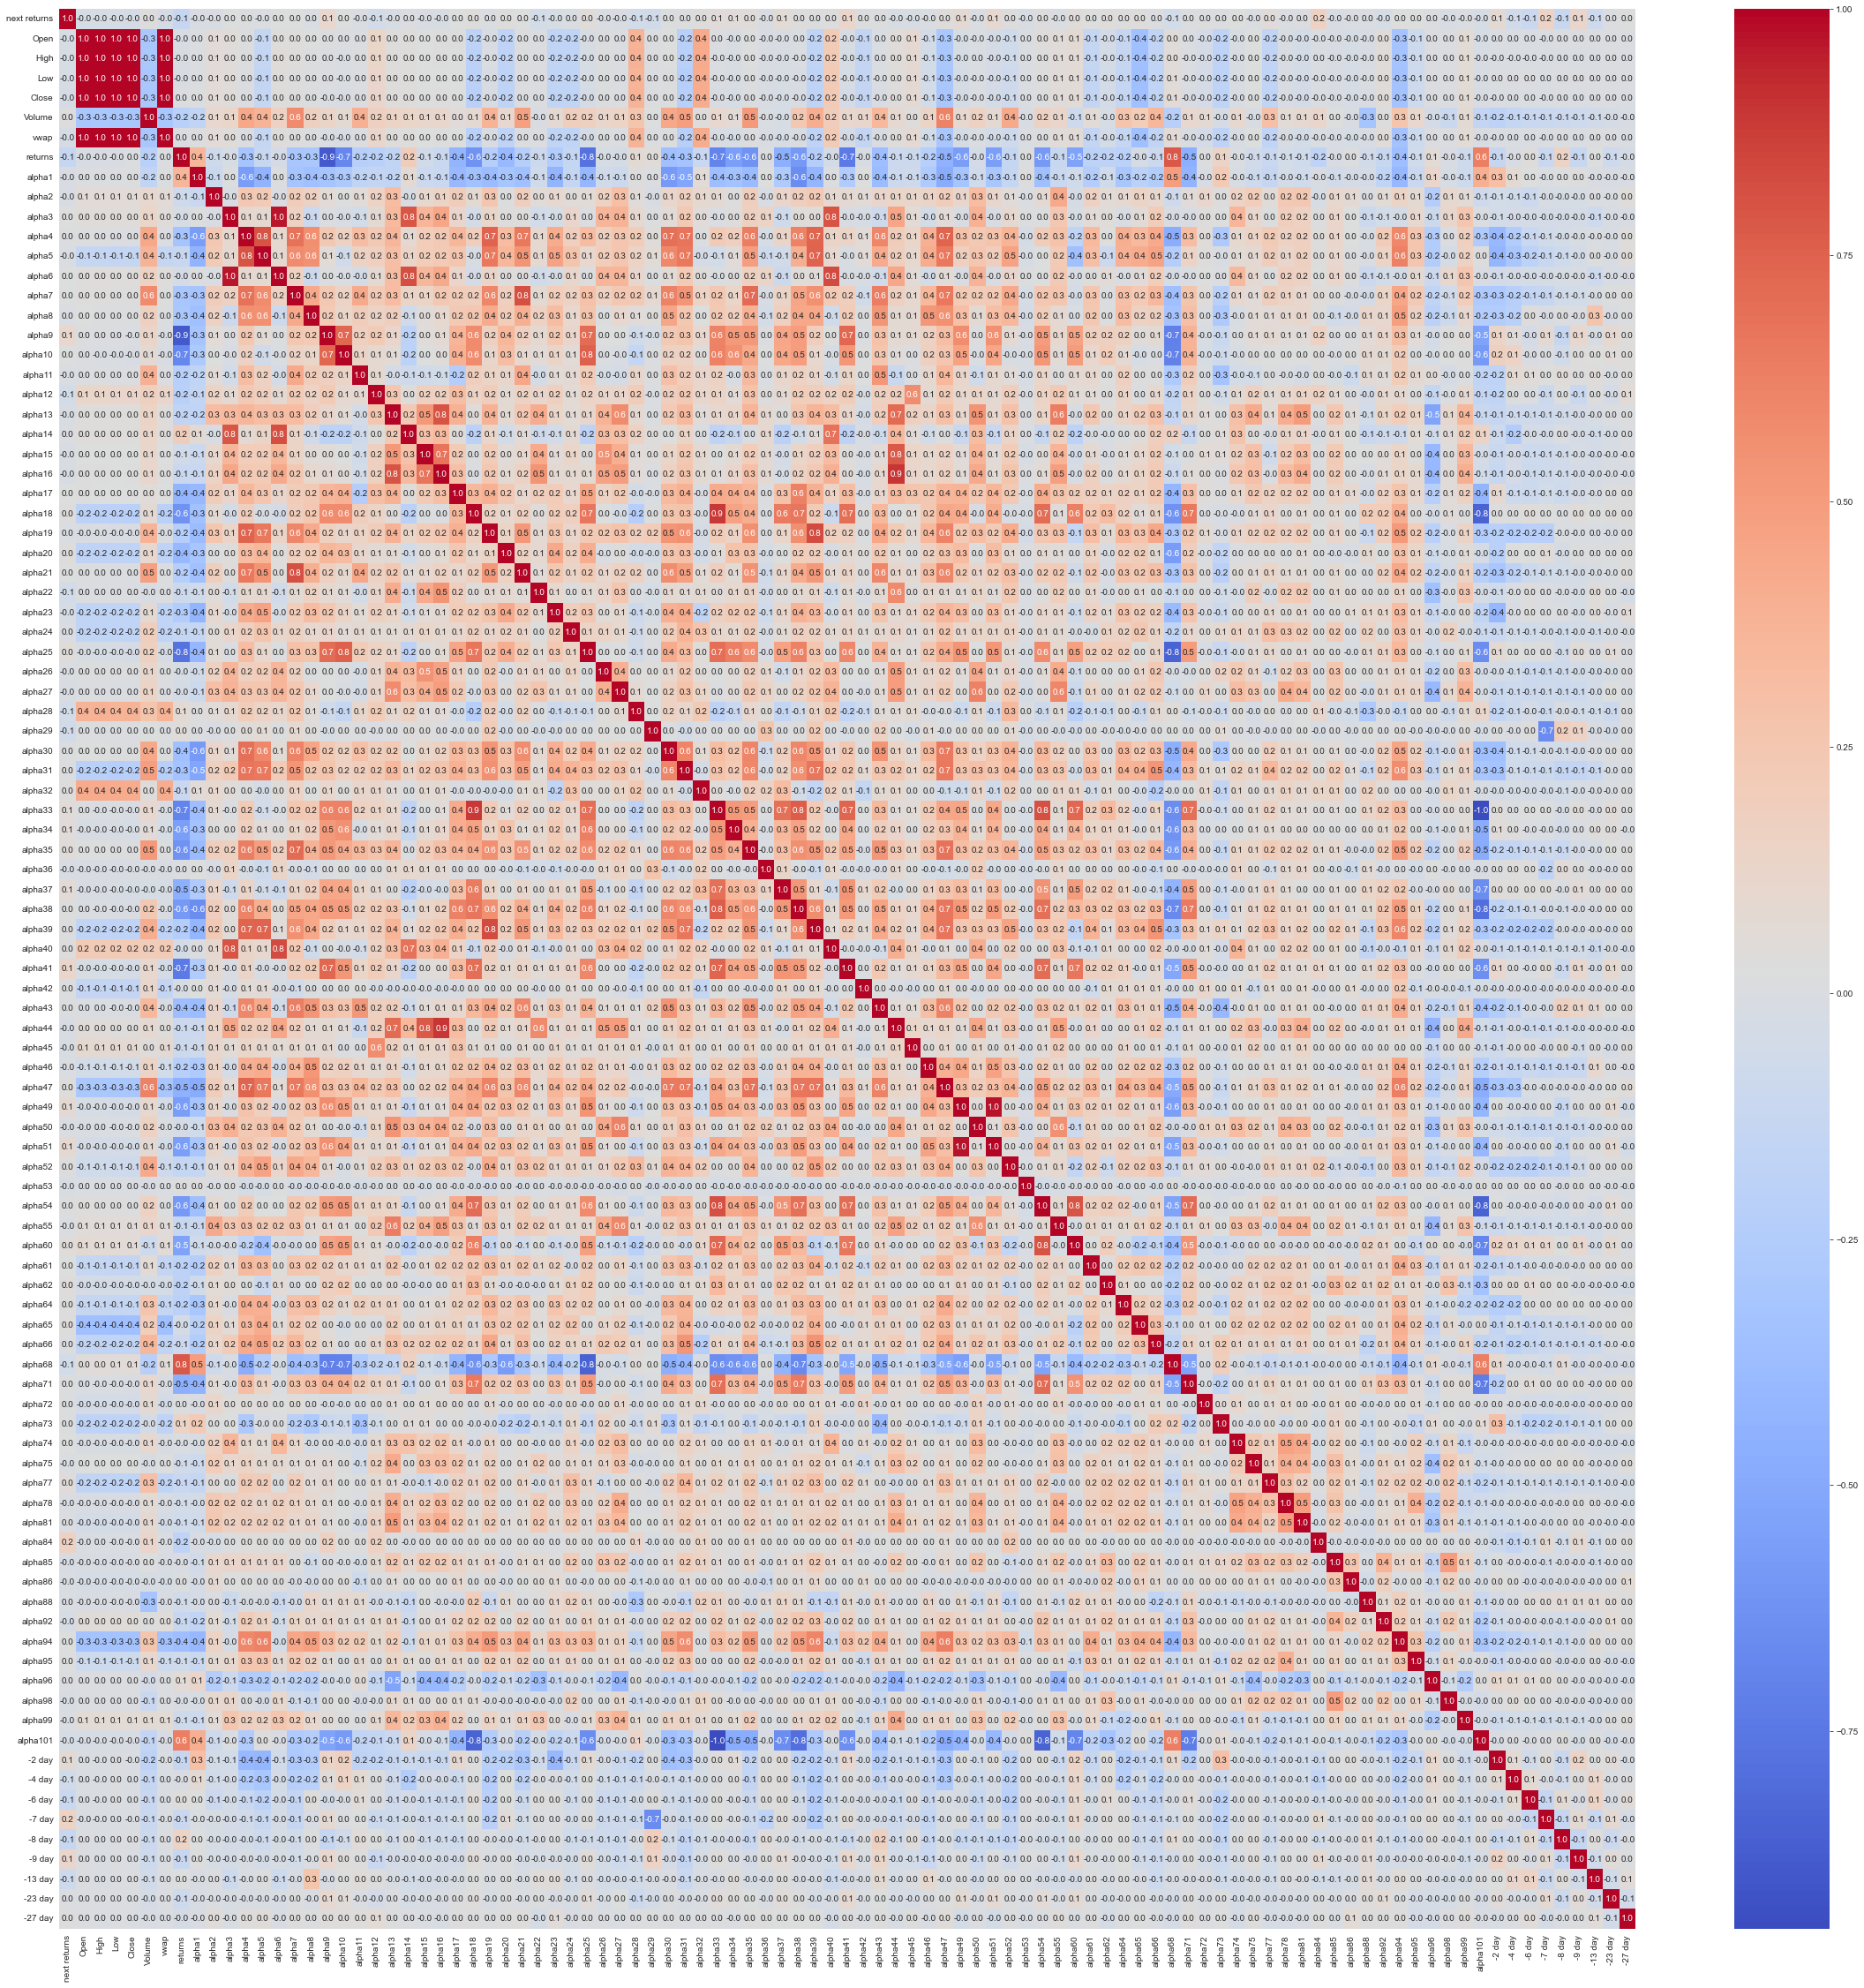

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(40,40))
sns.heatmap(data.corr(), xticklabels=1, yticklabels=1, cmap='coolwarm',annot=True,fmt='0.1f')

In [20]:
open_df = data.Open

In [19]:
data = data.drop(['Low','Volume','High','vwap','Open'],axis=1)

In [22]:
columnas,indices = correlation(data,0.85)

In [23]:
columnas

['returns', 'alpha101', 'alpha44', 'alpha49', 'alpha6', 'alpha18']

In [24]:
indices

{2, 8, 20, 46, 50, 82}

In [25]:
data = data.drop(columnas,axis=1)

<AxesSubplot:>

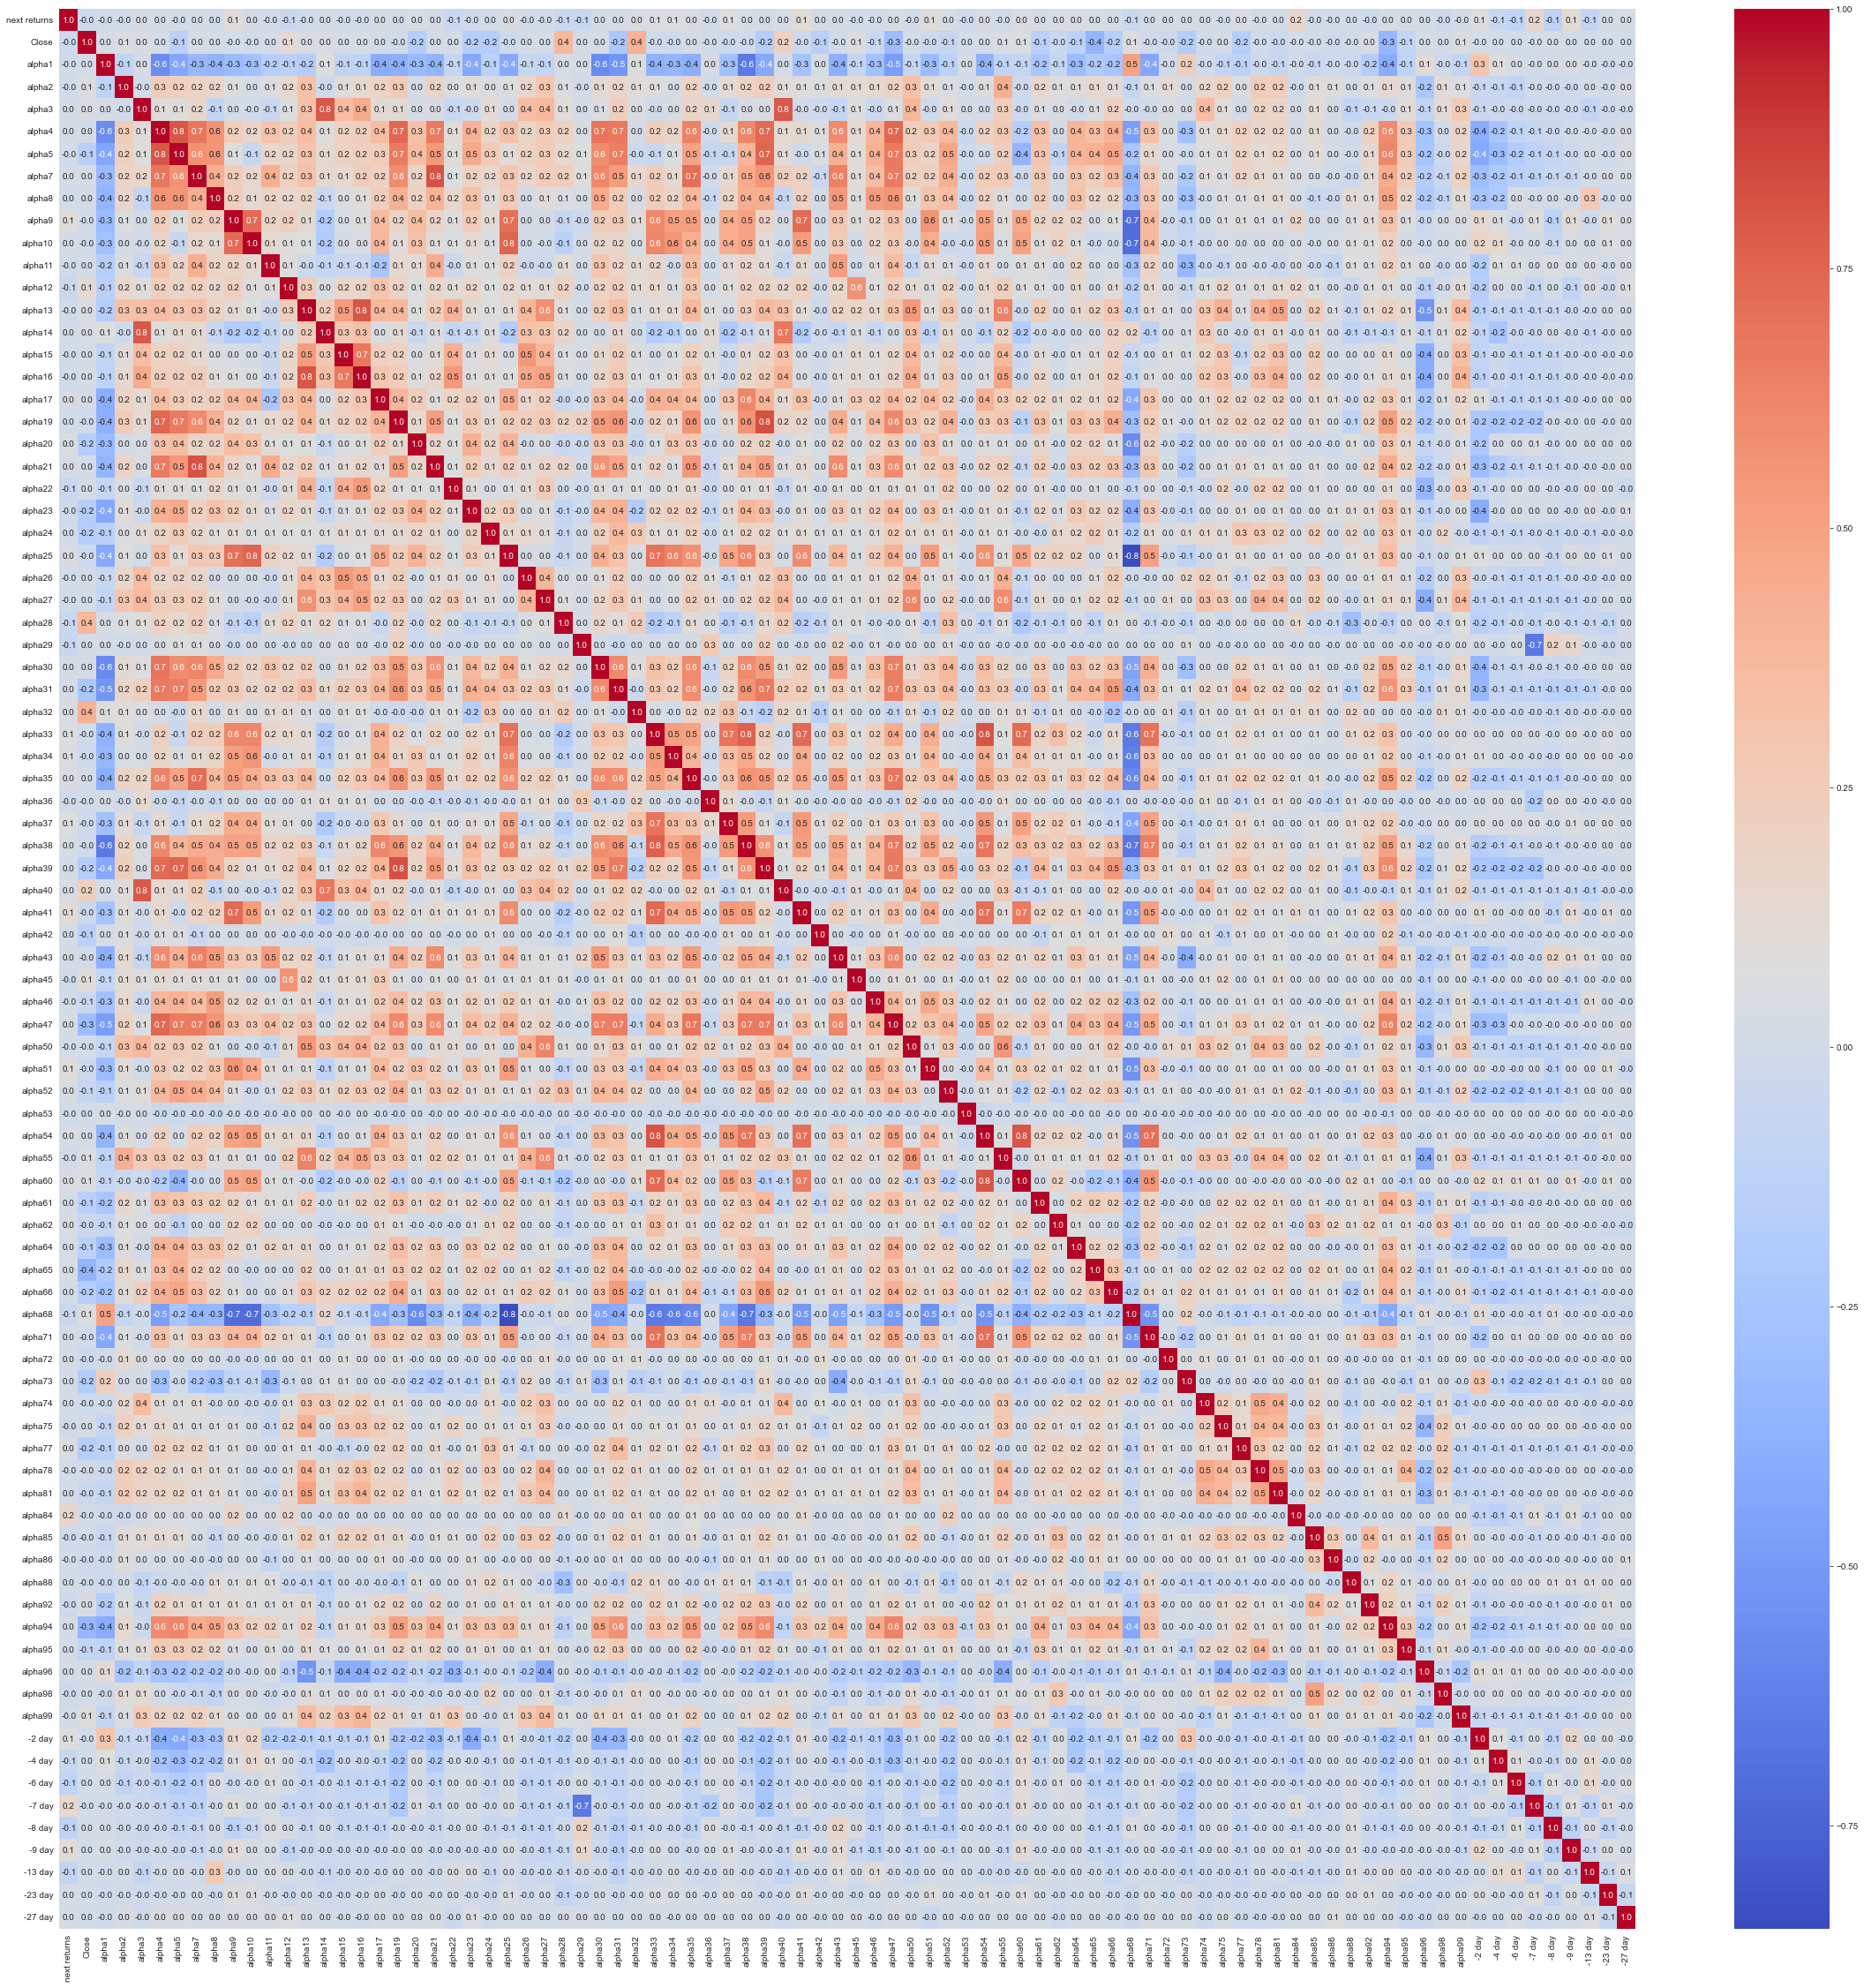

In [26]:
plt.subplots(figsize=(40,40))
sns.heatmap(data.corr(), xticklabels=1, yticklabels=1, cmap='coolwarm',annot=True,fmt='0.1f')

In [27]:
data

next returns       Close    alpha1    alpha2    alpha3    alpha4  \
Date                                                                           
2012-10-15      0.010133  119.366585       NaN       NaN       NaN       NaN   
2012-10-16      0.004535  120.576149       NaN       NaN       NaN       NaN   
2012-10-17     -0.002599  121.122955       NaN       NaN       NaN       NaN   
2012-10-18     -0.016665  120.808121       NaN       NaN       NaN       NaN   
2012-10-19      0.000140  118.794884       NaN       NaN       NaN       NaN   
...                  ...         ...       ...       ...       ...       ...   
2022-10-10     -0.006333  360.019989 -0.443642  0.522104  0.347362 -0.222222   
2022-10-11     -0.003298  357.739990 -0.177497  0.448061  0.252213 -0.111111   
2022-10-12      0.026391  356.559998 -0.320899  0.091750  0.020725 -0.222222   
2022-10-13     -0.022789  365.970001  0.302447 -0.608834  0.301627 -0.111111   
2022-10-14           NaN  357.630005  0.002006 -0.284940  0.211087 -0.444444   

              alpha5    alpha7    alpha8    alpha9  ...   alpha99    -2 day  \
Date                                                ...                       
2012-10-15       NaN -1.000000       NaN       NaN  ...       NaN       NaN   
2012-10-16       NaN -1.000000       NaN -1.209564  ...       NaN       NaN   
2012-10-17       NaN -1.000000       NaN -0.546806  ...       NaN  0.010133   
2012-10-18       NaN -1.000000       NaN  0.314835  ...       NaN  0.004535   
2012-10-19       NaN -1.000000       NaN  2.013237  ...       NaN -0.002599   
...              ...       ...       ...       ...  ...       ...       ...   
2022-10-10 -0.057439 -1.000000 -0.967626  2.770020  ... -0.491979 -0.027894   
2022-10-11 -0.018548 -1.000000 -0.566347 -2.279999  ... -0.391608 -0.007635   
2022-10-12 -0.024332 -1.000000 -0.050759 -1.179993  ... -0.247223 -0.006333   
2022-10-13 -0.004388  0.416667 -0.795364 -9.410004  ... -0.134513 -0.003298   
2022-10-14 -0.409453  0.783333 -0.839329  8.339996  ... -0.245167  0.026391   

              -4 day    -6 day    -7 day    -8 day    -9 day   -13 day  \
Date                                                                     
2012-10-15       NaN       NaN       NaN       NaN       NaN       NaN   
2012-10-16       NaN       NaN       NaN       NaN       NaN       NaN   
2012-10-17       NaN       NaN       NaN       NaN       NaN       NaN   
2012-10-18       NaN       NaN       NaN       NaN       NaN       NaN   
2012-10-19  0.010133       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2022-10-10 -0.002328  0.026401 -0.015464 -0.020889  0.019676 -0.008400   
2022-10-11 -0.010316  0.030987  0.026401 -0.015464 -0.020889 -0.016755   
2022-10-12 -0.027894 -0.002328  0.030987  0.026401 -0.015464 -0.009893   
2022-10-13 -0.007635 -0.010316 -0.002328  0.030987  0.026401 -0.002553   
2022-10-14 -0.006333 -0.027894 -0.010316 -0.002328  0.030987  0.019676   

             -23 day   -27 day  
Date                            
2012-10-15       NaN       NaN  
2012-10-16       NaN       NaN  
2012-10-17       NaN       NaN  
2012-10-18       NaN       NaN  
2012-10-19       NaN       NaN  
...              ...       ...  
2022-10-10  0.006536  0.003138  
2022-10-11  0.015535 -0.010544  
2022-10-12  0.010748 -0.003773  
2022-10-13 -0.043483  0.017965  
2022-10-14  0.003816  0.006536  

[2517 rows x 87 columns]

In [28]:
data['Open'] = open_df

### Limpiar y Normalizar datos

In [30]:
data.dropna(axis=1,how='all',inplace=True)

In [31]:
data.dropna(axis=0,inplace=True)

In [32]:
data

next returns       Close    alpha1    alpha2    alpha3    alpha4  \
Date                                                                           
2013-10-15      0.013966  143.668381  0.002006  0.837104  0.144324 -1.000000   
2013-10-16      0.006683  145.674820  0.302447  0.630211  0.005426 -1.000000   
2013-10-17      0.006754  146.648422  0.302447  0.546596  0.036931 -1.000000   
2013-10-18      0.000058  147.638947  0.302447  0.609252  0.106372 -1.000000   
2013-10-21      0.005791  147.647446  0.302447  0.414525  0.514069 -1.000000   
...                  ...         ...       ...       ...       ...       ...   
2022-10-07     -0.007635  362.790009 -0.320899  0.664837  0.566897 -0.555556   
2022-10-10     -0.006333  360.019989 -0.443642  0.522104  0.347362 -0.222222   
2022-10-11     -0.003298  357.739990 -0.177497  0.448061  0.252213 -0.111111   
2022-10-12      0.026391  356.559998 -0.320899  0.091750  0.020725 -0.222222   
2022-10-13     -0.022789  365.970001  0.302447 -0.608834  0.301627 -0.111111   

              alpha5    alpha7    alpha8     alpha9  ...    -2 day    -4 day  \
Date                                                 ...                       
2013-10-15 -0.334463 -0.250000 -0.772182   1.049805  ...  0.003994  0.021558   
2013-10-16 -0.330275 -0.916667 -0.832934  -2.006439  ... -0.007254  0.006443   
2013-10-17 -0.335261 -1.000000 -0.823341  -0.973602  ...  0.013966  0.003994   
2013-10-18 -0.424411 -1.000000 -0.758993  -0.990524  ...  0.006683 -0.007254   
2013-10-21 -0.420821 -1.000000 -0.754596  -0.008499  ...  0.006754  0.013966   
...              ...       ...       ...        ...  ...       ...       ...   
2022-10-07 -0.305345  0.250000 -0.986411  10.410004  ... -0.010316  0.030987   
2022-10-10 -0.057439 -1.000000 -0.967626   2.770020  ... -0.027894 -0.002328   
2022-10-11 -0.018548 -1.000000 -0.566347  -2.279999  ... -0.007635 -0.010316   
2022-10-12 -0.024332 -1.000000 -0.050759  -1.179993  ... -0.006333 -0.027894   
2022-10-13 -0.004388  0.416667 -0.795364  -9.410004  ... -0.003298 -0.007635   

              -6 day    -7 day    -8 day    -9 day   -13 day   -23 day  \
Date                                                                     
2013-10-15 -0.011647 -0.008645  0.007577 -0.009221 -0.004597  0.002249   
2013-10-16  0.000725 -0.011647 -0.008645  0.007577 -0.005328  0.005788   
2013-10-17  0.021558  0.000725 -0.011647 -0.008645  0.007916  0.004462   
2013-10-18  0.006443  0.021558  0.000725 -0.011647 -0.000945  0.011574   
2013-10-21  0.003994  0.006443  0.021558  0.000725 -0.009221 -0.001676   
...              ...       ...       ...       ...       ...       ...   
2022-10-07 -0.015464 -0.020889  0.019676 -0.002553 -0.017444  0.017965   
2022-10-10  0.026401 -0.015464 -0.020889  0.019676 -0.008400  0.006536   
2022-10-11  0.030987  0.026401 -0.015464 -0.020889 -0.016755  0.015535   
2022-10-12 -0.002328  0.030987  0.026401 -0.015464 -0.009893  0.010748   
2022-10-13 -0.010316 -0.002328  0.030987  0.026401 -0.002553 -0.043483   

             -27 day        Open  
Date                              
2013-10-15  0.009576  144.354126  
2013-10-16  0.007397  144.531902  
2013-10-17  0.003139  145.082203  
2013-10-18 -0.002656  147.190248  
2013-10-21  0.002249  147.689778  
...              ...         ...  
2022-10-07 -0.007609  368.970001  
2022-10-10  0.003138  363.959991  
2022-10-11 -0.010544  358.239990  
2022-10-12 -0.003773  358.170013  
2022-10-13  0.017965  349.209991  

[2184 rows x 87 columns]

In [33]:
data.describe()

next returns        Close       alpha1       alpha2       alpha3  \
count   2184.000000  2184.000000  2184.000000  2184.000000  2184.000000   
mean       0.000437   264.146687    -0.004626     0.120736     0.258301   
std        0.011140    90.499965     0.277741     0.454461     0.388796   
min       -0.109424   143.668381    -0.443642    -0.978837    -0.895961   
25%       -0.003544   183.660362    -0.320899    -0.210636     0.009941   
50%        0.000651   247.604408     0.002006     0.151276     0.297935   
75%        0.005510   317.786888     0.302447     0.476191     0.574850   
max        0.090603   472.242310     0.302447     0.985339     0.937606   

            alpha4       alpha5       alpha7       alpha8       alpha9  ...  \
count  2184.000000  2184.000000  2184.000000  2184.000000  2184.000000  ...   
mean     -0.642247    -0.250217    -0.532189    -0.495280    -0.096546  ...   
std       0.331475     0.147932     0.686633     0.297883     3.277741  ...   
min      -1.000000    -0.500199    -1.000000    -1.000000   -20.312088  ...   
25%      -1.000000    -0.381033    -1.000000    -0.761091    -1.299610  ...   
50%      -0.777778    -0.250398    -1.000000    -0.490608    -0.096092  ...   
75%      -0.333333    -0.121011    -0.083333    -0.234113     0.904167  ...   
max      -0.111111    -0.000199     1.000000    -0.000400    28.222412  ...   

            -2 day       -4 day       -6 day       -7 day       -8 day  \
count  2184.000000  2184.000000  2184.000000  2184.000000  2184.000000   
mean      0.000435     0.000462     0.000396     0.000379     0.000399   
std       0.011168     0.011218     0.011209     0.011205     0.011212   
min      -0.109424    -0.109424    -0.109424    -0.109424    -0.109424   
25%      -0.003575    -0.003602    -0.003602    -0.003588    -0.003624   
50%       0.000547     0.000596     0.000532     0.000527     0.000545   
75%       0.005449     0.005491     0.005396     0.005354     0.005449   
max       0.090603     0.090603     0.090603     0.090603     0.090603   

            -9 day      -13 day      -23 day      -27 day         Open  
count  2184.000000  2184.000000  2184.000000  2184.000000  2184.000000  
mean      0.000431     0.000495     0.000510     0.000521   264.128329  
std       0.011196     0.011167     0.011129     0.011094    90.512282  
min      -0.109424    -0.109424    -0.109424    -0.109424   144.354126  
25%      -0.003584    -0.003537    -0.003500    -0.003478   183.561378  
50%       0.000633     0.000601     0.000643     0.000637   247.906424  
75%       0.005464     0.005520     0.005491     0.005464   317.790035  
max       0.090603     0.090603     0.090603     0.090603   473.735036  

[8 rows x 84 columns]

Cambiamos las variables categoricas binarias por su representacoón numérica:

In [34]:
data.replace({False: 0, True: 1}, inplace=True)

Añadimos una nueva versión de la variable objetivo para el caso de clasificación:
-Si el retorno en el siguiente periodo es positivo, 1
-Si el retorno en el siguiente periodo es negativo, 0

In [35]:
data['next movement'] = np.where(data['next returns']>0,1,0)

In [36]:
data.insert(0, 'next movement', data.pop('next movement'))

In [37]:
data

next movement  next returns       Close    alpha1    alpha2  \
Date                                                                      
2013-10-15              1      0.013966  143.668381  0.002006  0.837104   
2013-10-16              1      0.006683  145.674820  0.302447  0.630211   
2013-10-17              1      0.006754  146.648422  0.302447  0.546596   
2013-10-18              1      0.000058  147.638947  0.302447  0.609252   
2013-10-21              1      0.005791  147.647446  0.302447  0.414525   
...                   ...           ...         ...       ...       ...   
2022-10-07              0     -0.007635  362.790009 -0.320899  0.664837   
2022-10-10              0     -0.006333  360.019989 -0.443642  0.522104   
2022-10-11              0     -0.003298  357.739990 -0.177497  0.448061   
2022-10-12              1      0.026391  356.559998 -0.320899  0.091750   
2022-10-13              0     -0.022789  365.970001  0.302447 -0.608834   

              alpha3    alpha4    alpha5    alpha7    alpha8  ...    -2 day  \
Date                                                          ...             
2013-10-15  0.144324 -1.000000 -0.334463 -0.250000 -0.772182  ...  0.003994   
2013-10-16  0.005426 -1.000000 -0.330275 -0.916667 -0.832934  ... -0.007254   
2013-10-17  0.036931 -1.000000 -0.335261 -1.000000 -0.823341  ...  0.013966   
2013-10-18  0.106372 -1.000000 -0.424411 -1.000000 -0.758993  ...  0.006683   
2013-10-21  0.514069 -1.000000 -0.420821 -1.000000 -0.754596  ...  0.006754   
...              ...       ...       ...       ...       ...  ...       ...   
2022-10-07  0.566897 -0.555556 -0.305345  0.250000 -0.986411  ... -0.010316   
2022-10-10  0.347362 -0.222222 -0.057439 -1.000000 -0.967626  ... -0.027894   
2022-10-11  0.252213 -0.111111 -0.018548 -1.000000 -0.566347  ... -0.007635   
2022-10-12  0.020725 -0.222222 -0.024332 -1.000000 -0.050759  ... -0.006333   
2022-10-13  0.301627 -0.111111 -0.004388  0.416667 -0.795364  ... -0.003298   

              -4 day    -6 day    -7 day    -8 day    -9 day   -13 day  \
Date                                                                     
2013-10-15  0.021558 -0.011647 -0.008645  0.007577 -0.009221 -0.004597   
2013-10-16  0.006443  0.000725 -0.011647 -0.008645  0.007577 -0.005328   
2013-10-17  0.003994  0.021558  0.000725 -0.011647 -0.008645  0.007916   
2013-10-18 -0.007254  0.006443  0.021558  0.000725 -0.011647 -0.000945   
2013-10-21  0.013966  0.003994  0.006443  0.021558  0.000725 -0.009221   
...              ...       ...       ...       ...       ...       ...   
2022-10-07  0.030987 -0.015464 -0.020889  0.019676 -0.002553 -0.017444   
2022-10-10 -0.002328  0.026401 -0.015464 -0.020889  0.019676 -0.008400   
2022-10-11 -0.010316  0.030987  0.026401 -0.015464 -0.020889 -0.016755   
2022-10-12 -0.027894 -0.002328  0.030987  0.026401 -0.015464 -0.009893   
2022-10-13 -0.007635 -0.010316 -0.002328  0.030987  0.026401 -0.002553   

             -23 day   -27 day        Open  
Date                                        
2013-10-15  0.002249  0.009576  144.354126  
2013-10-16  0.005788  0.007397  144.531902  
2013-10-17  0.004462  0.003139  145.082203  
2013-10-18  0.011574 -0.002656  147.190248  
2013-10-21 -0.001676  0.002249  147.689778  
...              ...       ...         ...  
2022-10-07  0.017965 -0.007609  368.970001  
2022-10-10  0.006536  0.003138  363.959991  
2022-10-11  0.015535 -0.010544  358.239990  
2022-10-12  0.010748 -0.003773  358.170013  
2022-10-13 -0.043483  0.017965  349.209991  

[2184 rows x 88 columns]

<AxesSubplot:>

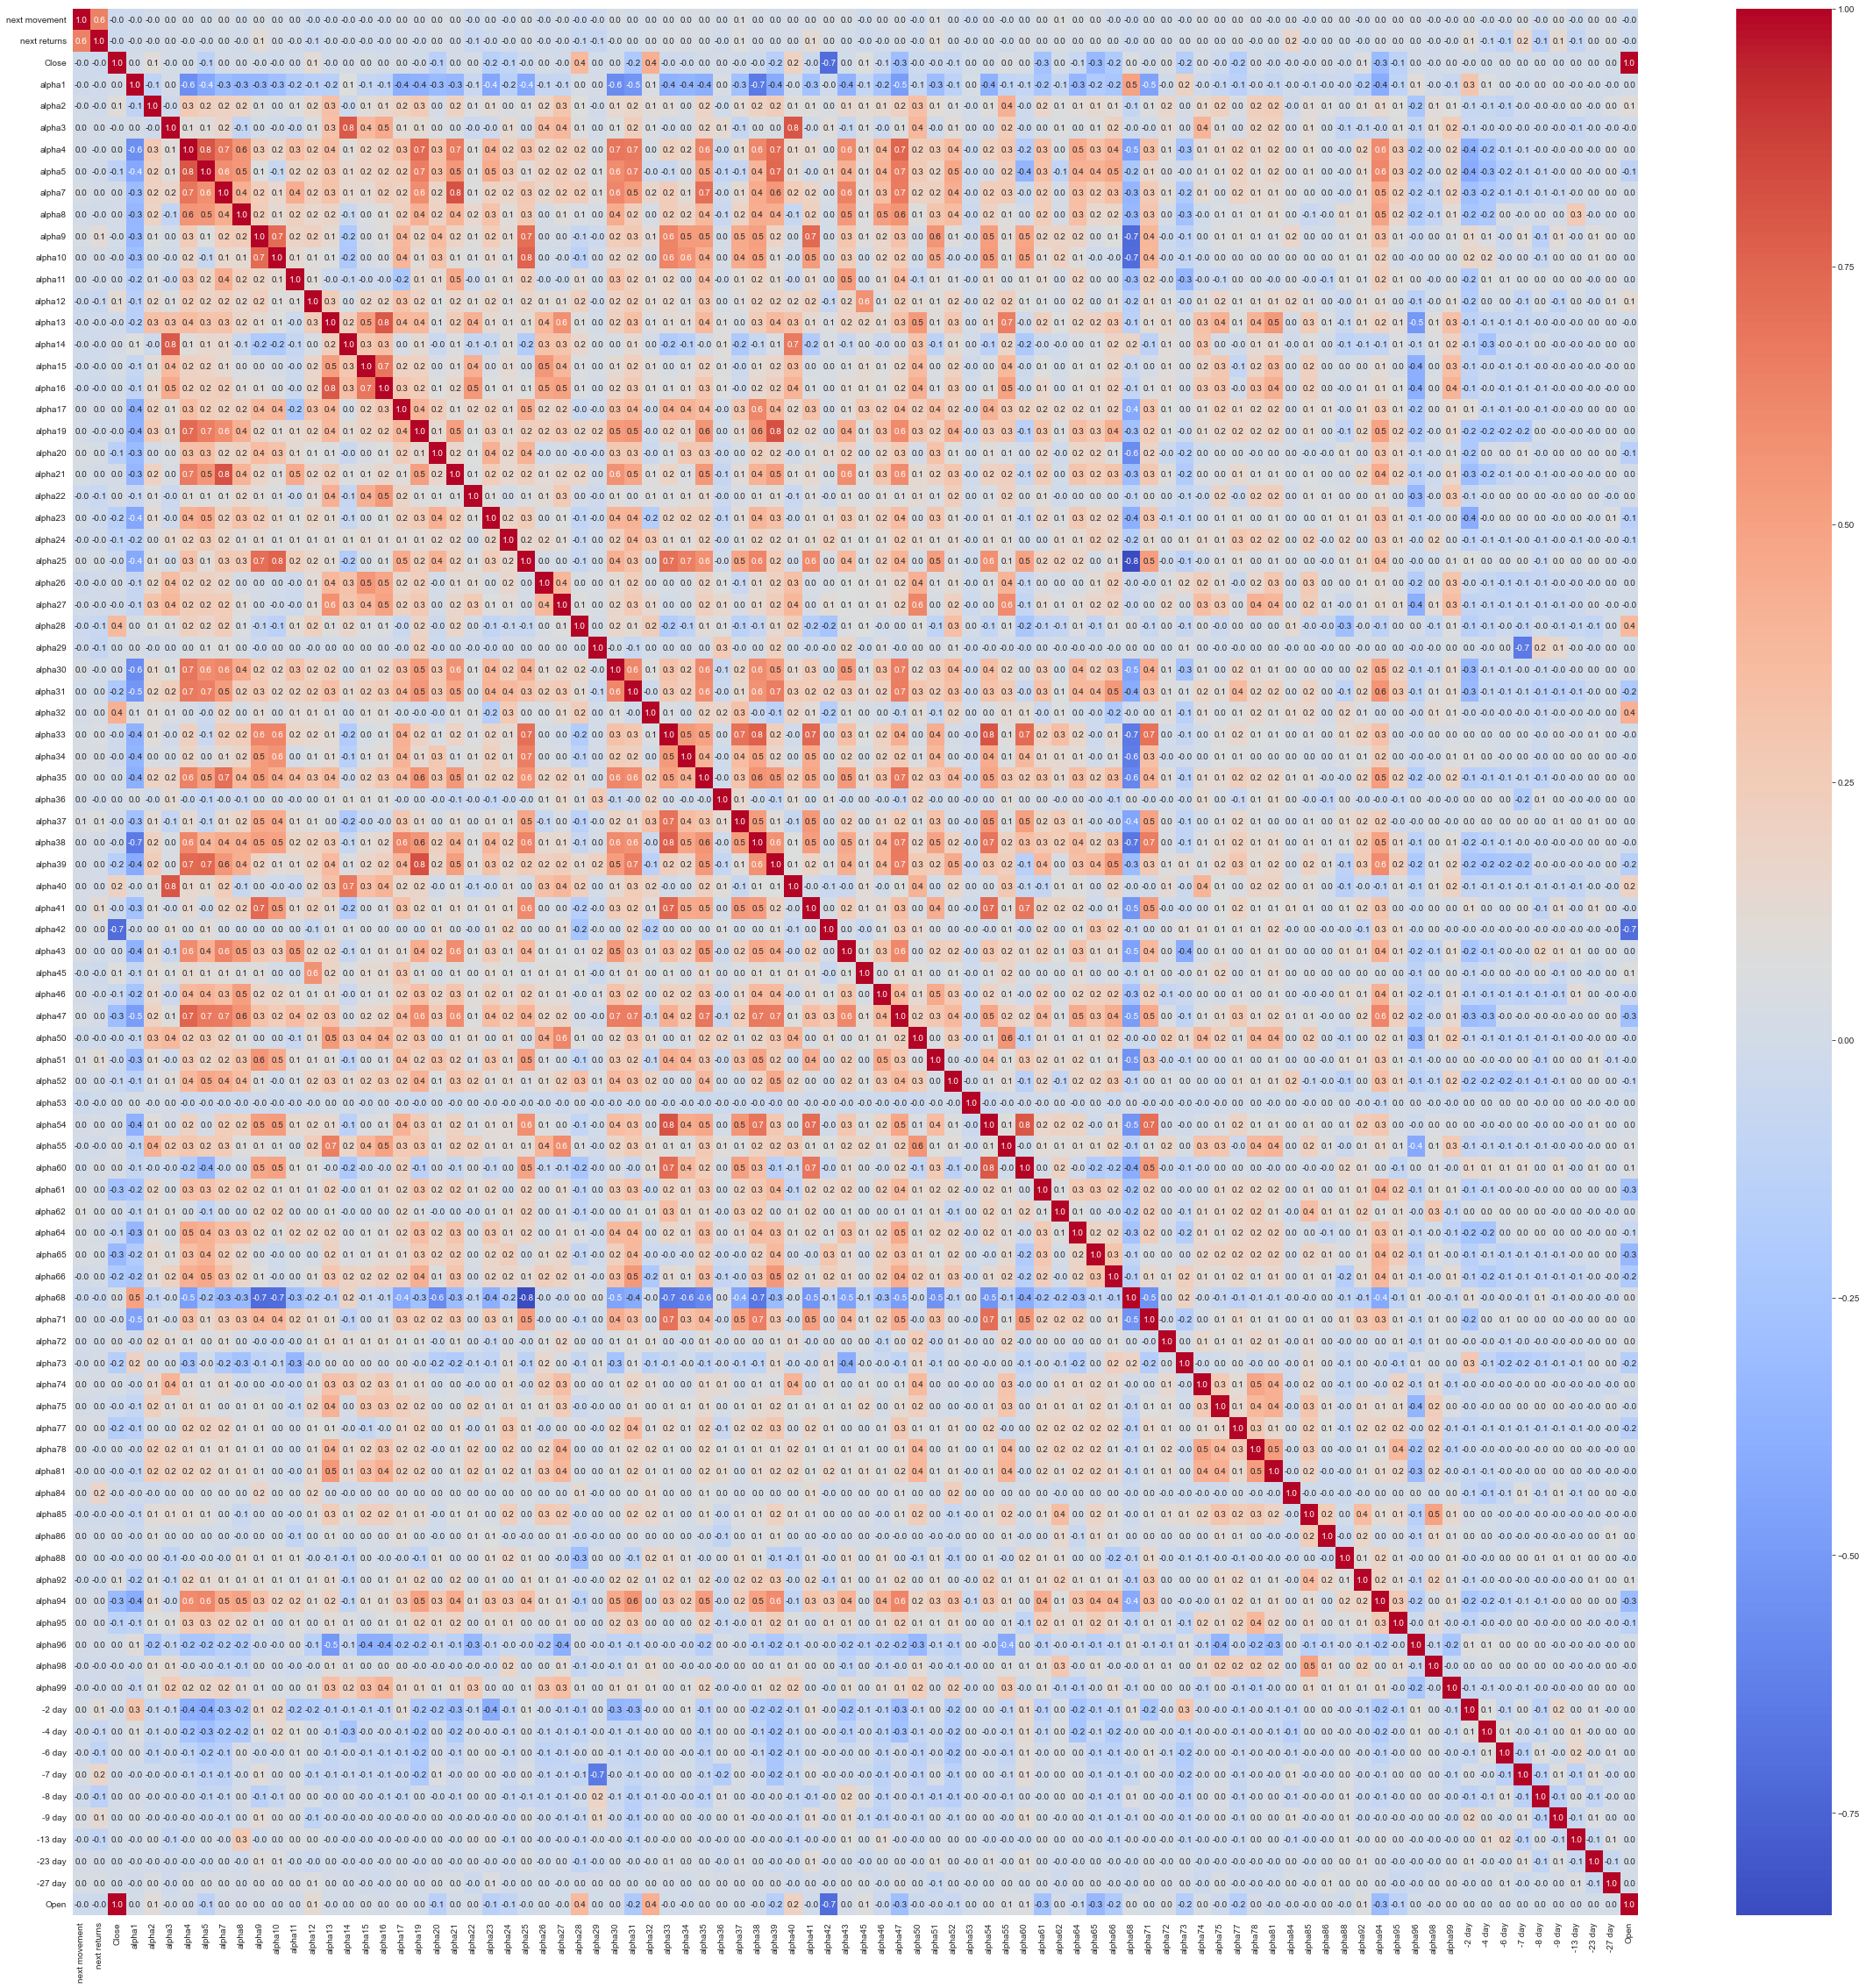

In [38]:
plt.subplots(figsize=(40,40))
sns.heatmap(data.corr(), xticklabels=1, yticklabels=1, cmap='coolwarm',annot=True,fmt='0.1f')

In [40]:
data.to_csv('spyconalfas.csv')

In [5]:
plot_candlesticks(pd.read_csv('datos/IBEX35/TEF_MC.csv', index_col=0))